# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Introduction-to-Machine-Learning" data-toc-modified-id="Introduction-to-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to Machine Learning</a></div><div class="lev2 toc-item"><a href="#Hello-World" data-toc-modified-id="Hello-World-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Hello World</a></div><div class="lev3 toc-item"><a href="#load-data-into-a-data-frame" data-toc-modified-id="load-data-into-a-data-frame-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>load data into a data frame</a></div><div class="lev3 toc-item"><a href="#define-target-variable-and-features" data-toc-modified-id="define-target-variable-and-features-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>define target variable and features</a></div><div class="lev3 toc-item"><a href="#train-the-model" data-toc-modified-id="train-the-model-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>train the model</a></div><div class="lev3 toc-item"><a href="#let's-do-some-predictions" data-toc-modified-id="let's-do-some-predictions-114"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>let's do some predictions</a></div><div class="lev4 toc-item"><a href="#how-come?" data-toc-modified-id="how-come?-1141"><span class="toc-item-num">1.1.4.1&nbsp;&nbsp;</span>how come?</a></div><div class="lev3 toc-item"><a href="#evaluate-the-performance" data-toc-modified-id="evaluate-the-performance-115"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>evaluate the performance</a></div><div class="lev2 toc-item"><a href="#Doing-it-better" data-toc-modified-id="Doing-it-better-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Doing it better</a></div><div class="lev3 toc-item"><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Train-Test Split</a></div><div class="lev3 toc-item"><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Cross-Validation</a></div><div class="lev3 toc-item"><a href="#GridSearch" data-toc-modified-id="GridSearch-123"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>GridSearch</a></div><div class="lev4 toc-item"><a href="#RandomForest" data-toc-modified-id="RandomForest-1231"><span class="toc-item-num">1.2.3.1&nbsp;&nbsp;</span>RandomForest</a></div><div class="lev4 toc-item"><a href="#Neural-Net" data-toc-modified-id="Neural-Net-1232"><span class="toc-item-num">1.2.3.2&nbsp;&nbsp;</span>Neural Net</a></div><div class="lev4 toc-item"><a href="#K-Nearest-Neighbors" data-toc-modified-id="K-Nearest-Neighbors-1233"><span class="toc-item-num">1.2.3.3&nbsp;&nbsp;</span>K Nearest Neighbors</a></div><div class="lev1 toc-item"><a href="#Remarks" data-toc-modified-id="Remarks-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Remarks</a></div>

# Introduction to Machine Learning

In [1]:
import numpy as np                                         # numerical computations
import pandas as pd                                        # data frames
import matplotlib.pyplot as plt                            # simple plotting
import seaborn as sns                                      # fancy plotting

from sklearn.ensemble import RandomForestClassifier        # machine learning
from sklearn.metrics import accuracy_score                 # evaluation

                                                           # show plots in outputs
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell # allow multiple outputs
InteractiveShell.ast_node_interactivity = "all"

## Hello World

### load data into a data frame

In [2]:
train = pd.read_csv("titanic.csv")

In [3]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


It's good practice to keep a description of the data at hand:
- Survived: 1 = yes, 0 = no
- Pclass: Ticket class -> 1 = Upper (1st), 2 = Middle (2nd), 3 = Lower (3rd)
- Sibsp: number of siblings / spouses aboard the Titanic (brother, sister, stepbrother, stepsister, husband, wife)
- Parch: number of parents / children aboard the Titanic (mother, father, daughter, son, stepdaughter, stepson)
- Fare: Passenger fare
- Sex: Passenger's sex
- Embarked: C = Cherbourg, Q = Queenstown, S = Southampton

### define target variable and features

In [4]:
target = train["Survived"]
features = train.drop("Survived", axis=1)

### train the model

In [5]:
clf = RandomForestClassifier()

In [6]:
model = clf.fit(features, target)

### let's do some predictions

we can use the trained model to make predictions about new or even hypothetical passengers

In [7]:
#columns:  "Age", "SibSp", "Parch", "Fare", "Pclass_2", "Pclass_3", "Sex_male", "Embarked_Q", "Embarked_S"
data =   [
          [   25,       2,       2,     15,          0,          0,          1,            0,           0 ], #young man with wife, brother, 2 children, 1st class...
          [   76,       1,       0,     65,          1,          0,          0,            1,           0 ], #old lady with husband, no kids, 2nd class, ... 
          [    5,       4,       2,      0,          0,          1,          0,            0,           1 ]  #5 year old girl with big family, 3rd class, ...
] 

predictions = model.predict(np.array(data))
print(["survives" if x == 1 else "dies" for x in predictions])

['dies', 'survives', 'dies']


#### how come?

Some machine learning models provide interpretable information about how they make their predictions.  
The Random Forest (and also the Boosting algorithms) can return which features are most important and which hardly play any role.  

In [8]:
feature_importances = pd.Series(model.feature_importances_, index=features.columns)
feature_importances.sort_values(ascending=False, inplace=True)
feature_importances = feature_importances.apply(lambda x : round(x * 100, 2))
fi_df = pd.DataFrame(feature_importances, columns=["Importance"])
fi_df.index.name = "Feature"

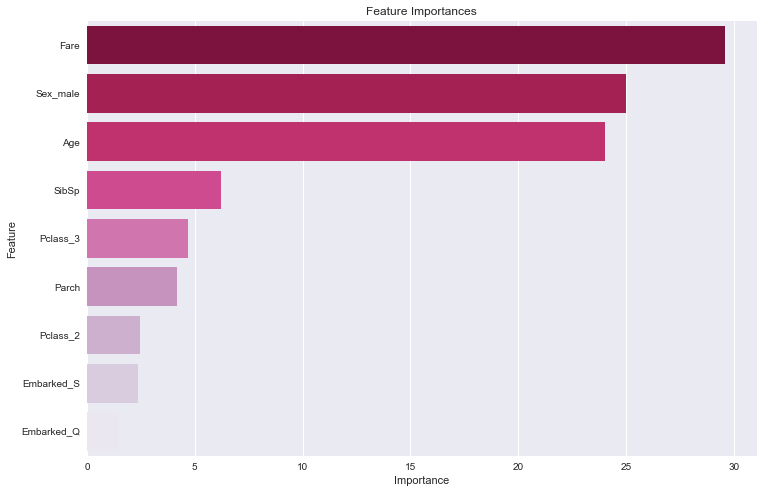

In [9]:
sns.plt.figure(figsize=(12,8));
ax = sns.barplot(data=fi_df, x="Importance", y=fi_df.index.get_level_values(0), palette="PuRd_r");
ax.set_title("Feature Importances");
ax.set_xlabel("Importance");
plt.show();

As we can see Sex, Fare and Age are by far the most important features. The other features don't matter much.  
And it makes sense that the port of embarkation is irrelevant for the chance of survival, doesn't it?  
We could've figured that out on our own by exploring the data manually with statistical methods and visualizations. But for datasets with lots of features this can come in handy as the number of possible combinations grows with the number of features.

### evaluate the performance

Ok, we can make predictions. But how much can we trust these?  
Let's see if the model is able to predict the survival for the data that we have.   
We can then compare the actual value (survived or died) with the predicted value and compute the error.

In [10]:
predictions = model.predict(features)

In [11]:
crosstable = pd.crosstab(predictions, target, margins=True)
crosstable.index.names = ["predicted"]
crosstable.columns.names = ["actual"]
crosstable.rename(index = {0 : "no", 1 : "yes"}, columns={0 : "no", 1 : "yes"}, inplace=True)
crosstable

actual,no,yes,All
predicted,,,
no,540,17,557
yes,9,325,334
All,549,342,891


In [12]:
accuracy = accuracy_score(target, predictions)
print("Accuracy: {0}".format(accuracy))
print("Error: {0}".format(1 - accuracy))

Accuracy: 0.9708193041526375
Error: 0.029180695847362492


An accuracy of ~97% out of the box should make you sceptical. What is too good to be true is probably not true.  
What did we do wrong? Well, the evaluation on the same data that we trained on will always be overly optimistic.  
In order to get a more realistic estimate of our model's performance we need to improve our methodology.

## Doing it better

### Train-Test Split

The "Hello World" example above has some flaws.  
One of them is that we evaluate the model with the training data. This is likely to lead to overfitting.  
Therefore we split the training data into a training set and a test set. We train on the former and evaluate on the latter.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [15]:
model = clf.fit(x_train, y_train)

In [16]:
predictions = model.predict(x_test)

In [17]:
accuracy_score(y_test, predictions)

0.76865671641791045

This seems to be a lot more reasonable.  
But how does this compare to a "baseline" prediction where we just predict that everybody died?

In [18]:
predictions = np.zeros(len(y_test))

In [19]:
accuracy_score(y_test, predictions)

0.58582089552238803

it's a good sign that the classifier performs better than the baseline. yay :-)  

### Cross-Validation

If we did the aforementioned procedure of splitting, training and evaluating again and again to optimize the parameters of our model, we'd still overfit!  
This happens because we'd eventually optimize our model for the test data, but wouldn't generalize to new, unseen data.  
Machine learning is about learning the relationships and internal rules of the data. But figuring out the best algorithm with the optimal parameters is a learning process on its own.   
To seperate these two steps it is recommended to split the data into three parts: First we cut off the test set which we hold back until the very end when we assess the performance of the selected model.  
The Cross-Validation function of sklearn does the 2nd split into train and validation set for us (k times).  

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
cv_scores = cross_val_score(clf, x_train, y_train, cv=4)
cv_scores
print("average cross validation score: {0}".format(cv_scores.mean()))

array([ 0.81460674,  0.79775281,  0.80337079,  0.79213483])

average cross validation score: 0.8019662921348314


### GridSearch

With the grid search approach we can try out every combination of the given parameters to find the best one.  
Note that this can take a long time.   
For large datasets you can use sklearn's `RandomizedSearchCV`, which doesn't try all combinations but converges towards the optimum relatively fast.

#### RandomForest

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
parameters = {'n_estimators':(5, 10, 50, 100), "max_depth":(None, 5, 10, 20)}
rf_clf = GridSearchCV(RandomForestClassifier(n_jobs=2), parameters, cv=4)

In [24]:
%time rf_clf.fit(x_train, y_train)

Wall time: 32.3 s


GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (5, 10, 50, 100), 'max_depth': (None, 5, 10, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [25]:
print("best parameters: {0}".format(rf_clf.best_params_))
print("best score: {0}".format(rf_clf.best_score_))

best parameters: {'max_depth': 5, 'n_estimators': 100}
best score: 0.8328651685393258


#### Neural Net

Sklearn provides the Multi-Layer-Perceptron classifier which is a simple neural net.  
Note that the `MLPClassifier` is sensitive to the scale of the features. To get better results it is recommended to scale or even standardize the data. To do that we subtract the mean from each value and divide by the standard deviation. As a result all datapoints are then centered around Zero and most of them are in the interval [-1, +1].  
The `StandardScaler` does this transformation for us.

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

We only need to scale the features that are numerical by nature, our dummy variables for categorials must not be scaled

In [27]:
columns_to_scale = ["Age", "SibSp", "Parch", "Fare"]

Never scale the whole dataset at once before splitting! It's because the distribution of the test set would influence the scaling of the training set, thus information would bleed from test to train data.  
That's why we fit to the training data only and then apply the transformation to training and test set seperately.

In [28]:
scaler = StandardScaler();
scaler.fit(x_train[columns_to_scale]);

x_train_scaled = scaler.transform(x_train[columns_to_scale])
x_train_not_scaled = x_train.drop(columns_to_scale, axis=1).as_matrix()

x_train_scaled = np.concatenate((x_train_scaled, x_train_not_scaled), axis=1)
x_test_scaled = np.concatenate((scaler.transform(x_test[columns_to_scale]), x_test.drop(columns_to_scale, axis=1)), axis=1)

StandardScaler(copy=True, with_mean=True, with_std=True)

The `MLPClassifier` has a lot more parameters to tune. For simplicity we choose only a few of them here and go with the defaults for the rest.

In [29]:
parameters = {"hidden_layer_sizes": (5, 10, 100), "alpha": (0.1, 0.01, 0.001, 0.0001)}
mlp_clf = GridSearchCV(MLPClassifier(solver='lbfgs'), parameters, cv=4)

In [30]:
%time mlp_clf.fit(x_train_scaled, y_train)

Wall time: 15.9 s


GridSearchCV(cv=4, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': (5, 10, 100), 'alpha': (0.1, 0.01, 0.001, 0.0001)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [31]:
print("best parameters: {0}".format(mlp_clf.best_params_))
print("best score: {0}".format(mlp_clf.best_score_))

best parameters: {'alpha': 0.01, 'hidden_layer_sizes': 5}
best score: 0.8174157303370787


The Random Forest seems to perform a littlebit better than the Neural Net.

#### K Nearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
parameters = {"n_neighbors": (2, 5, 10, 50), "leaf_size": (1, 5, 10, 30)}
knn_clf = GridSearchCV(KNeighborsClassifier(), parameters, cv=4)

In [34]:
%time knn_clf.fit(x_train_scaled, y_train)

Wall time: 2.19 s


GridSearchCV(cv=4, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': (2, 5, 10, 50), 'leaf_size': (1, 5, 10, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [35]:
print("best parameters: {0}".format(knn_clf.best_params_))
print("best score: {0}".format(knn_clf.best_score_))

best parameters: {'leaf_size': 1, 'n_neighbors': 10}
best score: 0.7991573033707865


Nearest Neighbors is last in our small ranking. But the decision which one to chose depends on the scenario of course.  

# Remarks

- Most often **Accuracy** is not the best metric to assess the model's performance (but it's the easiest to grasp). Depending on the type of problem (regression or classification) there are many more metrics available.  
- If we ran the notebook several times we'd still notice quite some changes in the evaluation scores. This type of variance is due to the small size of the data (reduced even further by the splitting). With more data the results would be more robust.
- We used **One-Hot-Encoding** to deal with the categorial data (Pclass, Sex, Embarked). But not all algorithms perform well with 1HE (see also https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/).
- model selection and parameter tuning are important, but not the only thing you can do to improve your models. **Feature Engineering**, **Feature Extraction** and **Feature Selection** are also important steps in any machine learning pipeline and can have a big (if not the biggest) impact on your success. 
